# kNN Regression- Abalone Dataset

In [19]:
import pandas as pd
url=("https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data")
abalone = pd.read_csv(url,header=None )

In [20]:
abalone.head()

,0,1,2,3,4,5,6,7,8
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [21]:
abalone.columns = ["Sex", "Length","Diameter","Height","Whole weight","Shucked weight","viscera weight","Shell weight","Rings"]

In [22]:
 abalone = abalone.drop("Sex", axis=1)


<AxesSubplot:>

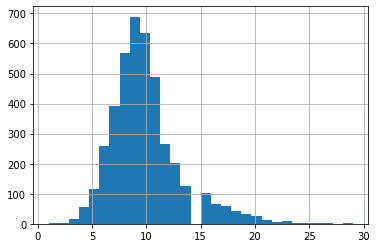

In [23]:
#Distribution of the target (Rings)
%matplotlib inline
import matplotlib.pyplot as plt
abalone["Rings"].hist(bins=30)

In [24]:
#Find out about correlation between the features and the target
correlation_matrix=abalone.corr()
correlation_matrix["Rings"]

Length            0.556720
Diameter          0.574660
Height            0.557467
Whole weight      0.540390
Shucked weight    0.420884
viscera weight    0.503819
Shell weight      0.627574
Rings             1.000000
Name: Rings, dtype: float64

In [25]:
#Removing a feature from the dataset
X=abalone.drop("Rings", axis=1)
X=X.values
y=abalone["Rings"]
y=y.values

In [26]:
#split the data into train ans test sets
from sklearn.model_selection import train_test_split
X_train,X_test , y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=0)

In [27]:
# Create a kNN regression model
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=3)
knn_model.fit(X_train, y_train)


KNeighborsRegressor(n_neighbors=3)

In [28]:
# Predict for training data and calculate prediction error
from sklearn.metrics import mean_squared_error
from math import sqrt
train_preds = knn_model.predict(X_train)
mse = mean_squared_error(y_train, train_preds)
rmse = sqrt(mse)
print(rmse)

1.6769809550347226


In [29]:
# Predict for test data and calsculate prediciton error
# If lower then the model can generalise well
# If higher then our model is overfitting
test_preds = knn_model.predict(X_test)
mse = mean_squared_error(y_test, test_preds)
rmse = sqrt(mse)
print(rmse)

2.3521117232702506


In [30]:
# Predict age of new abalone
import numpy as np
X_new = np.array([[0.569552, 0.446407, 0.154437, 1.016849, 0.439051, 0.222526, 0.291208]])
pred_X_new = knn_model.predict(X_new)
print("Age of new abalone is", pred_X_new[0], "years.")

Age of new abalone is 10.0 years.


In [31]:
# Evaluate model accuracy (instead of error) on test data
knn_model.score(X_test, y_test)

0.4905827744714798

In [32]:
# Evaluate3 model accuracy (instead of error) on train data
# If higher then model is overfitting
knn_model.score(X_train, y_train)

0.7262399588705739

# Tuning the Model
The accuracy of our model is higher on the training data than on the test data. This means that it is overfitting. We need to try and improve its performance. One parameter we can change is the number of neighbors. We can use grid search to try many different values of k and then choose the best k.

In [33]:
from sklearn.model_selection import GridSearchCV
parameters = {"n_neighbors": range(1, 50)}
gridsearch = GridSearchCV(KNeighborsRegressor(), parameters)
gridsearch.fit(X_train, y_train) # Train using the best k found

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 50)})

In [34]:
gridsearch.best_params_

{'n_neighbors': 13}

In [35]:
train_preds_grid = gridsearch.predict(X_train)
train_mse = mean_squared_error(y_train, train_preds_grid)
train_rmse = sqrt(train_mse)
test_preds_grid = gridsearch.predict(X_test)
test_mse = mean_squared_error(y_test, test_preds_grid)
test_rmse = sqrt(test_mse)
print("Train error:", train_rmse)
print("Test error:", test_rmse)

Train error: 1.9936245969578905
Test error: 2.159209107491972
